# Entrainer un réseau de neurones avec la bibliothèque Keras

### Objectif : 
- Entrainer un réseau de neurones avec la bibliothèque Keras basée sur `tensorflow`

### Jeu de données:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [33]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

ModuleNotFoundError: No module named 'tensorflow'

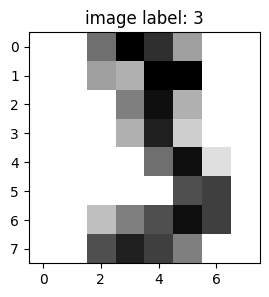

In [11]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

## Apprentissage / Validation

On sépare le jeu de données entre apprentissage et validation pour estimer la capacité de généralisation de notre modèle (il faudrait aussi un ensemble de test pour évaluer rigoureusement la performance).


In [12]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

## Prétraitement des données en entrée

On s'assure que les entrées ont à peu près la même magnitude en les normalisant :

In [13]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Affichage d'un des individus transformés :

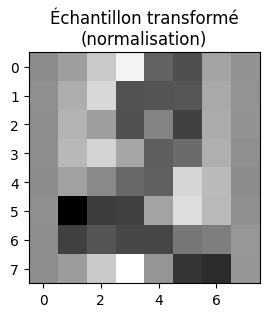

In [14]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Échantillon transformé\n(normalisation)");

In [15]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [16]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


## Prétraitement des données cible

Pour entrainer notre premier réseau de neurones pour de la classification multi-classes, il faut transformer notre vecteur cible avec une représentation "one-hot-encoding". On peut voir que les lables des données sont encodées par des entiers :

In [17]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras fournit une fonction utilitaire pour réaliser la conversion d'une catégorie codée sous forme d'entier à un codage "one-hot"::

In [30]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

ModuleNotFoundError: No module named 'tensorflow'

## Réseau de neurone à propagation avant (*Feed Forward Network*)

On va contruire une premier modèle avec [Keras](https://www.tensorflow.org/guide/keras/overview) pour expérimenter avec différents optimiseurs, activations, tailles de couches de neurones, initialisations

### Un premier modèle Keras

On va définir notre premier réseau de neurone à propagation avant en utilisant l'API dehaut niveau de Keras:

- D'abord, on définit le modèle en empilant les couches avec les bonnes dimensions
- Ensuite on définit une fonction de perte (*loss function*) et l'on choisit l'optimiseur de descente de gradient (*SGD*)
- Ensuite on entrainele modèle avec le jeu d'apprentissage pour un certain nombre d'époques (*epoch*)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
39/39 [==============================] - 3s 27ms/step - loss: 0.9708 - accuracy: 0.7445 - val_loss: 0.4314 - val_accuracy: 0.9085
Epoch 2/15
39/39 [==============================] - 0s 12ms/step - loss: 0.3385 - accuracy: 0.9304 - val_loss: 0.2792 - val_accuracy: 0.9346
Epoch 3/15
39/39 [==============================] - 0s 10ms/step - loss: 0.2256 - accuracy: 0.9590 - val_loss: 0.2199 - val_accuracy: 0.9510
Epoch 4/15
39/39 [==============================] - 1s 13ms/step - loss: 0.1744 - accuracy: 0.9697 - val_loss: 0.1856 - val_accuracy: 0.9608
Epoch 5/15
39/39 [==============================] - 0s 11ms/step - loss: 0.1431 - accuracy: 0.9746 - val_loss: 0.1749 - val_accuracy: 0.9641
Epoch 6/15
39/39 [==============================] - 0s 10ms/step - loss: 0.1214 - accuracy: 0.9803 - val_loss: 0.1498 - val_accuracy: 0.9706
Epoch 7/15
39/39 [==============================] - 0s 11ms/step - loss: 0.1060 - accuracy: 0.9820 - val_loss: 0.1429 - val_accuracy: 0.9739
Epoch 8/15
39

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               6500      
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 7510 (29.34 KB)
Trainable params: 7510 (29.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualisation de la convergence

In [ ]:
history.history

{'loss': [2.014594554901123,
  1.420143961906433,
  1.0853235721588135,
  0.8808627724647522,
  0.7455998063087463,
  0.6479283571243286,
  0.5749041438102722,
  0.5187925696372986,
  0.4743826389312744,
  0.4375632405281067,
  0.4071284234523773,
  0.38086238503456116,
  0.35868212580680847,
  0.33884960412979126,
  0.3212980031967163],
 'accuracy': [0.34316134452819824,
  0.665847659111023,
  0.7657657861709595,
  0.8271908164024353,
  0.8583128452301025,
  0.875511884689331,
  0.8927108645439148,
  0.9009009003639221,
  0.9099099040031433,
  0.914004921913147,
  0.9180999398231506,
  0.9254709482192993,
  0.932841956615448,
  0.9369369149208069,
  0.9426699280738831],
 'val_loss': [1.5908995866775513,
  1.1794692277908325,
  0.9380291700363159,
  0.7844493389129639,
  0.677003026008606,
  0.6002184748649597,
  0.5416961312294006,
  0.4970549941062927,
  0.46101051568984985,
  0.4297577738761902,
  0.40101733803749084,
  0.3789130747318268,
  0.3595866858959198,
  0.3425474762916565,

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

On peut mettre cela dans une DataFrame Pandas pouren simplifier l'affichage:

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.014595,0.343161,1.590900,0.601307,0
1,1.420144,0.665848,1.179469,0.735294,1
2,1.085324,0.765766,0.938029,0.813725,2
3,0.880863,0.827191,0.784449,0.849673,3
4,0.745600,0.858313,0.677003,0.859477,4
5,0.647928,0.875512,0.600218,0.885621,5
6,0.574904,0.892711,0.541696,0.892157,6
7,0.518793,0.900901,0.497055,0.901961,7
8,0.474383,0.909910,0.461011,0.905229,8
9,0.437563,0.914005,0.429758,0.915033,9


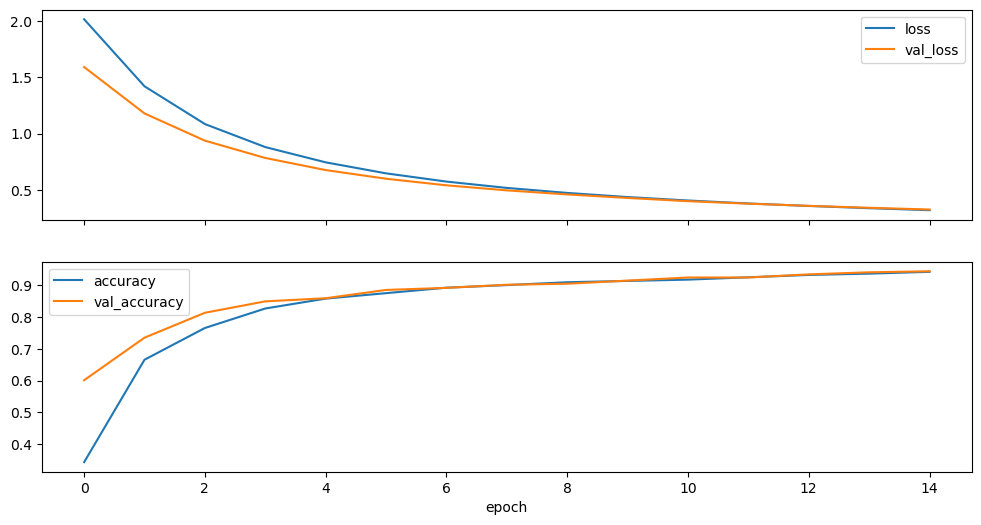

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### Suivi de la convergence avec Tensorboard

Tensorboard est un outil intégré de suivi de l'entrainement des réseaux de neurones:

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf tensorboard_logs

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,
          callbacks=[tensorboard_callback]);

Epoch 1/15
39/39 [==============================] - 3s 34ms/step - loss: 0.9596 - accuracy: 0.7617 - val_loss: 0.4392 - val_accuracy: 0.8922
Epoch 2/15
39/39 [==============================] - 1s 18ms/step - loss: 0.3266 - accuracy: 0.9361 - val_loss: 0.2780 - val_accuracy: 0.9248
Epoch 3/15
39/39 [==============================] - 1s 20ms/step - loss: 0.2202 - accuracy: 0.9566 - val_loss: 0.2263 - val_accuracy: 0.9477
Epoch 4/15
39/39 [==============================] - 1s 16ms/step - loss: 0.1716 - accuracy: 0.9681 - val_loss: 0.1943 - val_accuracy: 0.9477
Epoch 5/15
39/39 [==============================] - 1s 19ms/step - loss: 0.1416 - accuracy: 0.9754 - val_loss: 0.1674 - val_accuracy: 0.9673
Epoch 6/15
39/39 [==============================] - 1s 20ms/step - loss: 0.1209 - accuracy: 0.9779 - val_loss: 0.1613 - val_accuracy: 0.9673
Epoch 7/15
39/39 [==============================] - 1s 23ms/step - loss: 0.1066 - accuracy: 0.9853 - val_loss: 0.1444 - val_accuracy: 0.9673
Epoch 8/15
39

In [ ]:
%tensorboard --logdir tensorboard_logs

### b) Exercises: Impact de l'optimiseur

- Essayer de diminuer la vitesse d'apprentissage par 10 ou 100. Qu'observez-vous ?

- Essayer d'augmenter la vitesse d'apprentissage pour faire diverger l'optimisation.

- Configurer l'optimiseur SGD pour avoir un *Nesterov momentum* de 0.9
  
**Remarques**: 

La documentation de l'API de Keras est disponible sur:

https://www.tensorflow.org/api_docs/python/tf/keras

On peut aussi utiliser la documentation en ligne :

```python
optimizers.SGD?
```

dans une cellule de code d'un notebook jupyter.

On peut aussi utiliser l'autocomplétion
```python
optimizers.SGD(<shift-tab>
```

In [ ]:
optimizers.SGD?

In [ ]:
# %load solutions/keras_sgd_and_momentum.py

- Remplacer l'optimiseur SGD un optimiseur Adam optimizer et l'exécuter avec les paramètres par défaut.

  Indice: utiliser `optimizers.<TAB>`pour avoir la liste des optimiseurs implémentés par Keras.

- Ajouter une autre couche cachée et utiliser le "Rectified Linear Unit" pour chaque couche cachée. Pouvez-vous toujours utiliser Adams avec la vitesse d'apprentissage par défaut ?

In [ ]:
# %load solutions/keras_adam.py

### Exercises: Forward Pass and Generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set: the fraction of test samples for which the model makes a prediction that matches the true label.

In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

### numpy arrays vs tensorflow tensors

In the previous exercises we used `model.predict_classes(...)` that returns a numpy array:

In [ ]:
predict_x= model.predict(X_test) 
predicted_labels_numpy=np.argmax(predict_x,axis=1)
predicted_labels_numpy

9/9 [==============================] - 0s 5ms/step


array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 7, 4, 8, 7, 0, 3, 6, 9, 1,
       9, 8, 0, 9, 3, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       6, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 8, 6, 5, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 7,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 7, 8, 8, 5, 8, 1, 4, 1, 2, 9, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 7, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 0, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 5, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 6, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 1, 4, 0, 8, 8, 6, 5, 0, 1, 6, 2, 0, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3,
       6, 0, 9, 6, 7, 6, 7, 5, 2, 6, 5, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 7, 9, 0])

In [ ]:
type(predicted_labels_numpy), predicted_labels_numpy.shape

(numpy.ndarray, (270,))

Alternatively one can directly call the model on the data to get the laster layer (softmax) outputs directly as a tensorflow Tensor:

In [ ]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.64426179e-04, 3.86421755e-02, 9.00815666e-01, 3.79519314e-02,
        2.39638146e-04, 4.72036627e-04, 1.00944447e-03, 7.79153546e-03,
        1.08671850e-02, 1.74588861e-03],
       [4.61499952e-02, 1.68532785e-03, 5.99085935e-04, 7.50653198e-05,
        9.20165300e-01, 7.05432729e-04, 2.48332098e-02, 4.74226149e-03,
        7.68131693e-04, 2.76265899e-04],
       [5.05961187e-04, 9.94862057e-03, 1.09397005e-02, 2.29136106e-02,
        6.92175282e-03, 3.36237135e-03, 6.74188137e-04, 9.33759689e-01,
        3.52481729e-03, 7.44915474e-03],
       [3.33449170e-02, 3.34457494e-02, 7.90465996e-03, 1.35735467e-01,
        2.89869052e-03, 1.06688440e-02, 6.10047020e-03, 3.22723156e-03,
        2.16168370e-02, 7.45057225e-01],
       [1.19578862e-03, 8.09913635e-01, 1.07163740e-02, 1.92247313e-02,
        1.06697967e-02, 1.52563618e-03, 1.90767564e-03, 3.05709951e-02,
        9.96021703e-02, 1.46732442e-02]], dtype=float32)>

In [ ]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([270, 10]))

We can use the tensorflow API to check that for each row, the probabilities sum to 1:

In [ ]:
import tensorflow as tf

tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.9999999, 1.0000001, 0.9999999, 1.       , 1.0000001],
      dtype=float32)>

We can also extract the label with the highest probability using the tensorflow API:

In [ ]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1])>

We can compare those labels to the expected labels to compute the accuracy with the Tensorflow API. Note however that we need an explicit cast from boolean to floating point values to be able to compute the mean accuracy when using the tensorflow tensors:

In [ ]:
accuracy_tf = tf.reduce_mean(tf.cast(predicted_labels_tf == y_test, tf.float64))
accuracy_tf

<tf.Tensor: shape=(), dtype=float64, numpy=0.9518518518518518>

Also note that it is possible to convert tensors to numpy array if one prefer to use numpy:

In [ ]:
accuracy_tf.numpy()

0.9518518518518518

In [ ]:
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1])>

In [ ]:
predicted_labels_tf.numpy()[:5]

array([2, 4, 7, 9, 1])

In [ ]:
(predicted_labels_tf.numpy() == y_test).mean()

0.9518518518518518

## Home Assignment: Impact of Initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [ ]:
from tensorflow.keras import initializers

normal_init = initializers.TruncatedNormal(stddev=0.01)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

/home/bernard/miniforge3/envs/teaching/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model.layers

Let's have a look at the parameters of the first layer after initialization but before any training has happened:

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.01368921,  0.00683239,  0.01295142, ...,  0.00303844,
          0.00372718,  0.00402904],
        [ 0.00954833, -0.0054127 , -0.0011359 , ...,  0.0052219 ,
          0.00092143, -0.00527342],
        [ 0.00071814,  0.00114469, -0.00266172, ..., -0.00984032,
         -0.00320896, -0.00556879],
        ...,
        [ 0.00330706, -0.00532768, -0.00681232, ...,  0.00728389,
         -0.01075729, -0.01147411],
        [-0.0150331 , -0.00288807, -0.00143874, ..., -0.00041232,
          0.00349914,  0.01191286],
        [ 0.0123184 ,  0.0149681 ,  0.01546972, ...,  0.01931405,
          0.00836396,  0.00389667]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
w = model.layers[0].weights[0].numpy()
w

array([[ 0.01368921,  0.00683239,  0.01295142, ...,  0.00303844,
         0.00372718,  0.00402904],
       [ 0.00954833, -0.0054127 , -0.0011359 , ...,  0.0052219 ,
         0.00092143, -0.00527342],
       [ 0.00071814,  0.00114469, -0.00266172, ..., -0.00984032,
        -0.00320896, -0.00556879],
       ...,
       [ 0.00330706, -0.00532768, -0.00681232, ...,  0.00728389,
        -0.01075729, -0.01147411],
       [-0.0150331 , -0.00288807, -0.00143874, ..., -0.00041232,
         0.00349914,  0.01191286],
       [ 0.0123184 ,  0.0149681 ,  0.01546972, ...,  0.01931405,
         0.00836396,  0.00389667]], dtype=float32)

In [ ]:
w.std()

0.008681422

In [ ]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Epoch 1/15
48/48 [==============================] - 2s 12ms/step - loss: 2.3027 - accuracy: 0.0930
Epoch 2/15
48/48 [==============================] - 0s 8ms/step - loss: 2.3025 - accuracy: 0.1048
Epoch 3/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1087
Epoch 4/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3021 - accuracy: 0.1087
Epoch 5/15
48/48 [==============================] - 0s 10ms/step - loss: 2.3019 - accuracy: 0.1087
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 2.3017 - accuracy: 0.1087
Epoch 7/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3014 - accuracy: 0.1087
Epoch 8/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3012 - accuracy: 0.1087
Epoch 9/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3010 - accuracy: 0.1087
Epoch 10/15
48/48 [==============================] - 0s 7ms/step - loss: 2.3008 - accuracy: 0.1087
Epoch 11/15
48/48

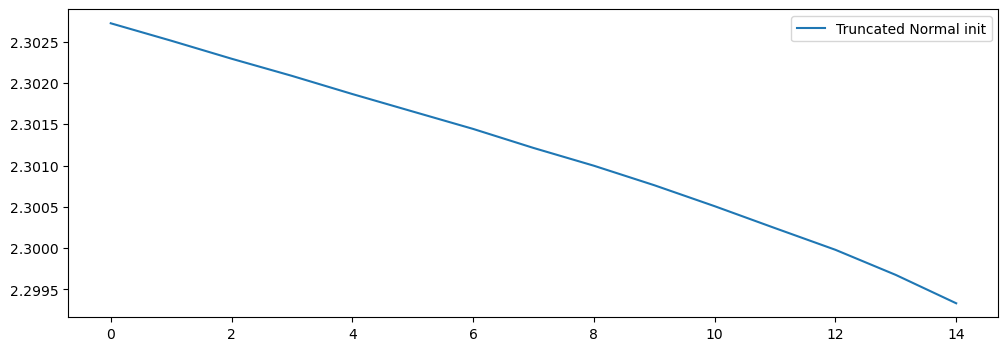

In [ ]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

Once the model has been fit, the weights have been updated and notably the biases are no longer 0:

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.01368921,  0.00683239,  0.01295142, ...,  0.00303844,
          0.00372718,  0.00402904],
        [ 0.00970834, -0.00587831, -0.00032709, ...,  0.00666083,
          0.00148372, -0.00649357],
        [ 0.00115202,  0.00094208, -0.00151406, ..., -0.00755765,
         -0.0017367 , -0.00870761],
        ...,
        [ 0.00365205, -0.0049471 , -0.00447563, ...,  0.00986201,
         -0.01114726, -0.01055491],
        [-0.01561184, -0.00299019,  0.00070162, ...,  0.00231056,
          0.0031554 ,  0.01239373],
        [ 0.01157695,  0.01474785,  0.01643968, ...,  0.02035365,
          0.00831993,  0.00420122]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 4.94867236e-05,  3.02165736e-05,  3.42775093e-05, -7.86543478e-06,
        -2.13712356e-05, -3.05798094e-05,  2.74408485e-05, -1.14289745e-04,
        -7.57239195e-06,  2.51888578e-05,  1.29030988e-04, -1.082388

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `stddev=1e-3`
  - a larger scale e.g. `stddev=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [ ]:
# %load solutions/keras_initializations.py

In [ ]:
# %load solutions/keras_initializations_analysis.py